# Color Thresholding for Lane Detection

## Purpose
Test and validate HSV color thresholding to detect white and yellow lane lines.

## Workflow
1. Import functions from `pipeline.py`
2. Load test frame and apply ROI
3. Test white lane detection
4. Test yellow lane detection
5. Test combined detection on multiple frames

## Color Thresholding Parameters (from pipeline.py)
- **White lanes**: High brightness (V≥170), low saturation (S≤30)
- **Yellow lanes**: Hue 15-35°, moderate saturation and value

## 1. Import Libraries and Pipeline Functions

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

# Add src directory to path
sys.path.insert(0, os.path.abspath('../src'))

# Import pipeline functions
from pipeline import apply_roi_mask, apply_color_threshold

print("✓ Libraries and pipeline functions imported")

✓ Libraries and pipeline functions imported


## 2. Load Test Frame and Apply Pipeline

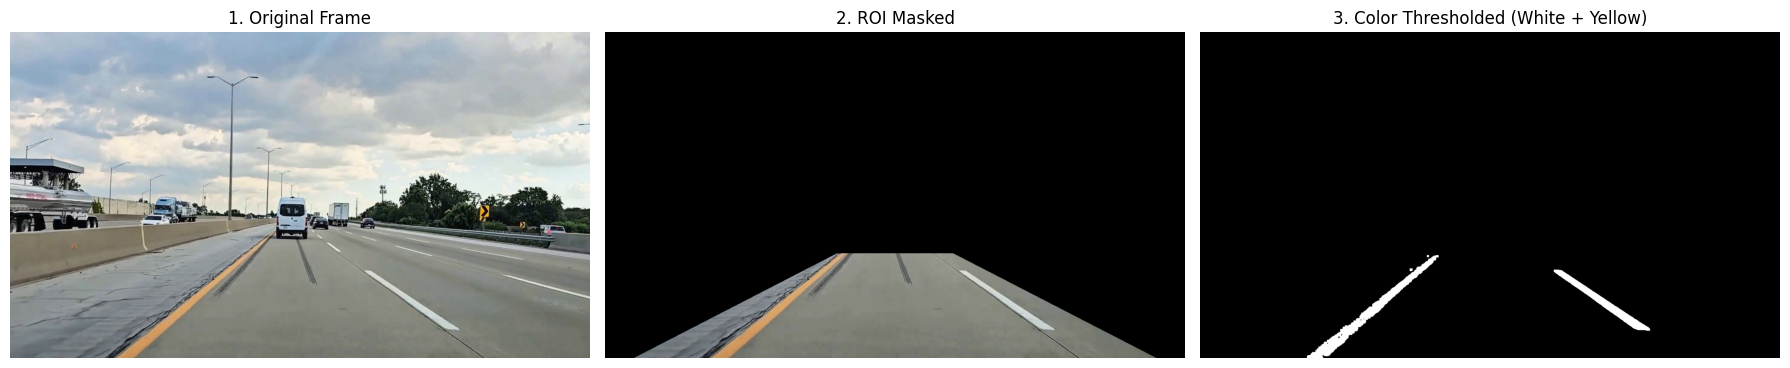

✓ Color thresholding applied to frame_t109_f6540.png


In [2]:
# Load test frame
frames_dir = "../data/frames_sample"
test_frame = "frame_t109_f6540.png"

img = cv2.imread(os.path.join(frames_dir, test_frame))

# Apply preprocessing: ROI + Color thresholding
img_roi, roi_pts = apply_roi_mask(img)
color_mask = apply_color_threshold(img_roi)

# Visualize pipeline stages
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title('1. Original Frame')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(img_roi, cv2.COLOR_BGR2RGB))
axes[1].set_title('2. ROI Masked')
axes[1].axis('off')

axes[2].imshow(color_mask, cmap='gray')
axes[2].set_title('3. Color Thresholded (White + Yellow)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print(f"✓ Color thresholding applied to {test_frame}")

## 3. Break Down Detection - White vs Yellow

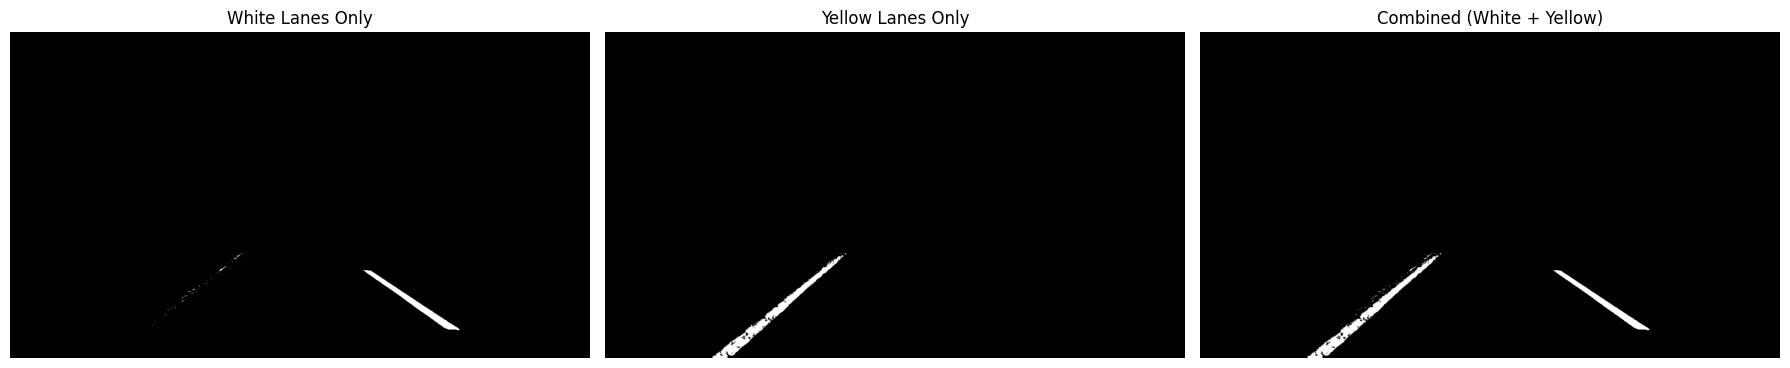

✓ White and yellow lane detection separated


In [3]:
# Convert to HSV for color-based detection
img_hsv = cv2.cvtColor(img_roi, cv2.COLOR_BGR2HSV)

# White lane detection (High V, Low S)
lower_white = np.array([0, 0, 170])
upper_white = np.array([180, 30, 255])
mask_white = cv2.inRange(img_hsv, lower_white, upper_white)

# Yellow lane detection (Hue 15-35°)
lower_yellow = np.array([15, 80, 70])
upper_yellow = np.array([35, 255, 255])
mask_yellow = cv2.inRange(img_hsv, lower_yellow, upper_yellow)

# Combined mask
mask_combined = cv2.bitwise_or(mask_white, mask_yellow)

# Visualize breakdown
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].imshow(mask_white, cmap='gray')
axes[0].set_title('White Lanes Only')
axes[0].axis('off')

axes[1].imshow(mask_yellow, cmap='gray')
axes[1].set_title('Yellow Lanes Only')
axes[1].axis('off')

axes[2].imshow(mask_combined, cmap='gray')
axes[2].set_title('Combined (White + Yellow)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("✓ White and yellow lane detection separated")

## 4. Test on Multiple Frames

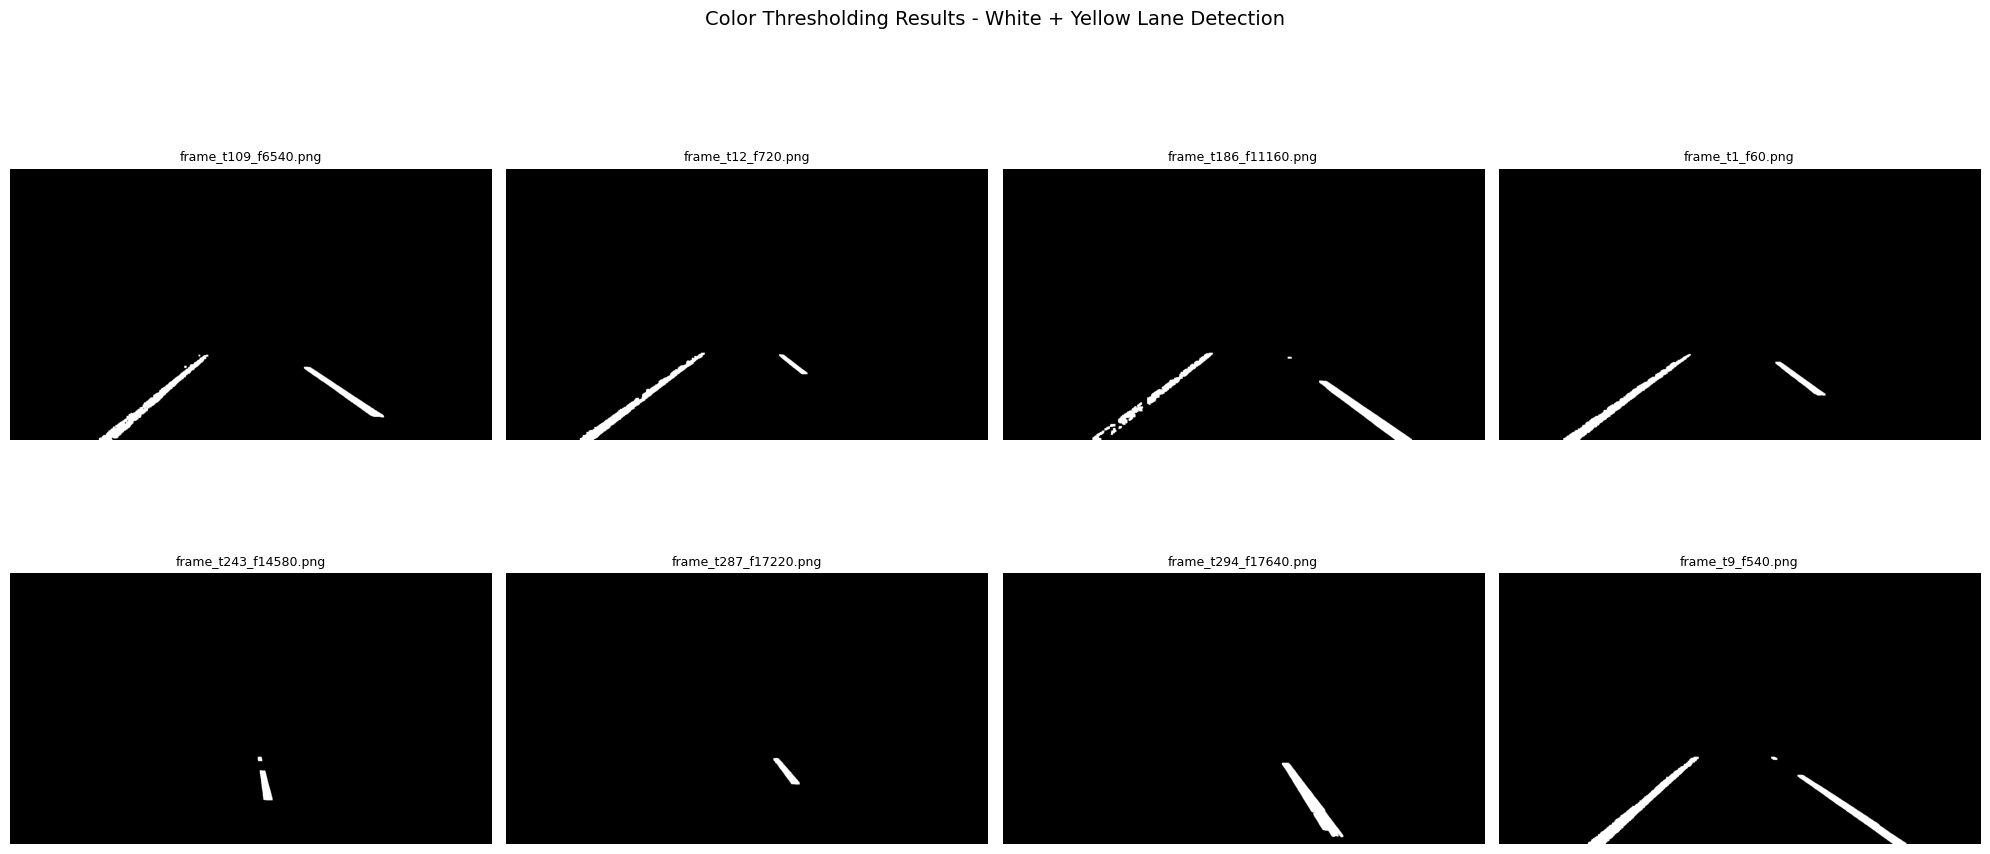

✓ Color thresholding tested on 8 frames


In [4]:
# Test frames with diverse lighting conditions
test_frames = [
    "frame_t109_f6540.png",
    "frame_t12_f720.png",
    "frame_t186_f11160.png",
    "frame_t1_f60.png",
    "frame_t243_f14580.png",
    "frame_t287_f17220.png",
    "frame_t294_f17640.png",
    "frame_t9_f540.png"
]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, frame_name in enumerate(test_frames):
    img = cv2.imread(os.path.join(frames_dir, frame_name))
    img_roi, _ = apply_roi_mask(img)
    mask = apply_color_threshold(img_roi)
    
    axes[idx].imshow(mask, cmap='gray')
    axes[idx].set_title(frame_name, fontsize=9)
    axes[idx].axis('off')

plt.suptitle("Color Thresholding Results - White + Yellow Lane Detection", fontsize=14)
plt.tight_layout()
plt.show()

print(f"✓ Color thresholding tested on {len(test_frames)} frames")